In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('CPR Mock Data.xlsx')
LLE = pd.read_excel('LLE.xlsx')


In [3]:
df_cleaned = data.dropna(thresh=len(data.columns) - 2)

In [4]:
df_cleaned['Learner'] = df_cleaned['Learner'].astype(float).astype(int)
LLE['CUST_PERNER'] = LLE['CUST_PERNER'].astype(float).astype(int)

C:\Users\gduln001\AppData\Local\Temp\1\ipykernel_23132\3056865338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Learner'] = df_cleaned['Learner'].astype(float).astype(int)


In [5]:
WDW = df_cleaned[df_cleaned['BA Text'] == 'Walt Disney World Resort']
DCL = df_cleaned[df_cleaned['BA Text'] == 'Disney Cruise Line']
#etc
CORPIT = df_cleaned[df_cleaned['BA Text'] == 'Corporate IT']
ABD = df_cleaned[df_cleaned['BA Text'] == 'Adventures by Disney']
DCORPADMN = df_cleaned[df_cleaned['BA Text'] == 'Disney Corp Administration']
PRADMN = df_cleaned[df_cleaned['BA Text'] == 'P&R Administration']




In [6]:
merged_df = WDW.merge(LLE, left_on='Learner', right_on='CUST_PERNER', how='left')

In [7]:
merged_df

,Last Name,First Name,Learner,REQ TYPE,CONTENT TYPE,Item Type,Item ID,Item Title,Required By Date,Completion Date,...,Employee Group,Segment,BA ID,BA Text,CUST_PERNER,LLE,E1,E2,E3,E4
0,Aaron,Richard,888876,SAFETY,BLEED,COURSE,4080000.0,WDW_SAFETY_LIFE BLEEDING CONTROL,2025-12-10,2023-12-11,...,Salaried,DPECP,138.0,Walt Disney World Resort,888876.0,"Arrington, LeRoy","Arrington, LeRoy","Ball, Charles A","Bisienere, Maribeth N",NaN
1,Aaron,Richard,888876,SAFETY,CPR/AED,COURSE,4620979.0,WDW_REG-SAFETY GLOBAL_LIFE CPR,2025-12-10,2023-12-11,...,Salaried,DPECP,138.0,Walt Disney World Resort,888876.0,"Arrington, LeRoy","Arrington, LeRoy","Ball, Charles A","Bisienere, Maribeth N",NaN
2,Abair,Gary,1363105,SAFETY,BLEED,COURSE,4080000.0,WDW_SAFETY_LIFE BLEEDING CONTROL,2026-03-20,2024-03-20,...,Hourly,DPECP,138.0,Walt Disney World Resort,1363105.0,"Geeslin, Robert C","Geeslin, Robert C","Reid, Linda J",NaN,NaN
3,Abair,Gary,1363105,SAFETY,CPR/AED,COURSE,4620979.0,WDW_REG-SAFETY GLOBAL_LIFE CPR,2026-03-20,2024-03-20,...,Hourly,DPECP,138.0,Walt Disney World Resort,1363105.0,"Geeslin, Robert C","Geeslin, Robert C","Reid, Linda J",NaN,NaN
4,Abalos-Moreo,Velvetann,92042863,SAFETY,BLEED,COURSE,4080000.0,WDW_SAFETY_LIFE BLEEDING CONTROL,2024-12-14,2022-12-15,...,Salaried,DPECP,138.0,Walt Disney World Resort,92042863.0,"Armor, Alison E",NaN,"Armor, Alison E","Bisienere, Maribeth N",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516,Zuchora,Cristine,1058072,SAFETY,BLEED,COURSE,4080000.0,WDW_SAFETY_LIFE BLEEDING CONTROL,2024-08-28,2022-08-29,...,Hourly,DPECP,138.0,Walt Disney World Resort,1058072.0,"Carballido Lamadrid, Grisell L","Carballido Lamadrid, Grisell L","Ball, Charles A","Bisienere, Maribeth N",NaN
9517,Zumwalt,Kayla,1440210,SAFETY,BLEED,COURSE,4080000.0,WDW_SAFETY_LIFE BLEEDING CONTROL,2024-12-29,2022-12-30,...,Hourly,DPECP,138.0,Walt Disney World Resort,1440210.0,"Dubiel, Susan R","Dubiel, Susan R","Riles, Sarah F","Kirk, Jason T",NaN
9518,Zumwalt,Kayla,1440210,SAFETY,CPR/AED,COURSE,4620979.0,WDW_REG-SAFETY GLOBAL_LIFE CPR,2024-12-29,2022-12-30,...,Hourly,DPECP,138.0,Walt Disney World Resort,1440210.0,"Dubiel, Susan R","Dubiel, Susan R","Riles, Sarah F","Kirk, Jason T",NaN
9519,Zuniga,Marisa,92087890,SAFETY,BLEED,COURSE,4080000.0,WDW_SAFETY_LIFE BLEEDING CONTROL,2024-11-16,2022-11-17,...,Salaried,DPECP,138.0,Walt Disney World Resort,92087890.0,"Geeslin, Robert C","Geeslin, Robert C","Reid, Linda J",NaN,NaN


In [8]:
WDW_counts = merged_df['Learner Item Status'].value_counts()

# Calculate percentage of each status
WDW_percentages = (WDW_counts / WDW_counts.sum()) * 100
WDW_percentages_rounded = WDW_percentages.round(1)
# Combine counts and percentages into a single DataFrame
report_WDW = pd.DataFrame({
    'Count': WDW_counts,
    'Percentage': WDW_percentages_rounded
})

print(report_WDW)


            Count  Percentage
Current      8882        93.3
Overdue       415         4.4
Coming Due    224         2.4


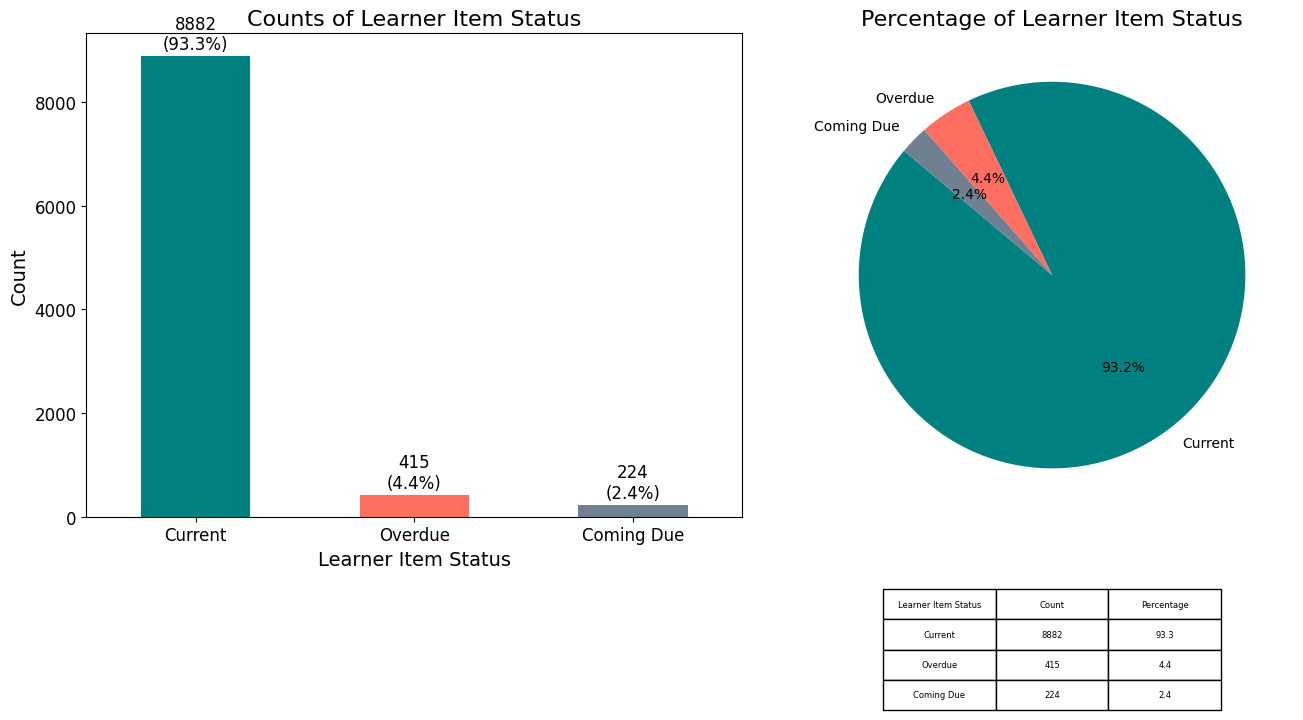

In [10]:
colors = ['#008080', '#FF6F61', '#708090']

# Plot the counts with enhanced style
plt.figure(figsize=(14, 7))
ax = plt.subplot(1, 2, 1)
bars = WDW_counts.plot(kind='bar', color=colors, ax=ax)
plt.title('Counts of Learner Item Status', fontsize=16)
plt.xlabel('Learner Item Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Annotate bars with counts and rounded percentages
for bar in bars.patches:
    height = bar.get_height()
    key = round(bar.get_x() + bar.get_width() / 2)
    percentage = WDW_percentages_rounded.get(key, 0)
    ax.annotate(f'{height}\n({percentage:.1f}%)',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # 5 points vertical offset
                textcoords="offset points",
                ha='center', fontsize=12)

# Plot the percentages as a pie chart
plt.subplot(1, 2, 2)
WDW_percentages_rounded.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Percentage of Learner Item Status', fontsize=16)
plt.ylabel('')

# Add a table below the bar chart
table_data = report_WDW.reset_index()
table_data.columns = ['Learner Item Status', 'Count', 'Percentage']

# Place the table below the first plot
plt.table(cellText=table_data.values,
          colLabels=table_data.columns,
          cellLoc='center',
          loc='bottom',
          bbox=[0.15, -0.4, 0.7, 0.25])

plt.subplots_adjust(bottom=0.3)

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
organization_name = 'Natter, Mark A'
filtered_df = merged_df[merged_df['E2'] == organization_name]

# Count occurrences of each status in the filtered DataFrame
status_counts = filtered_df['Learner Item Status'].value_counts()

# Calculate percentage of each status rounded to 1 decimal place
status_percentages = (status_counts / status_counts.sum()) * 100
status_percentages_rounded = status_percentages.round(1)

# Combine counts and rounded percentages into a single DataFrame
report_df = pd.DataFrame({
    'Count': status_counts,
    'Percentage': status_percentages_rounded
})

# Define a new color palette
colors = ['#008080', '#FF6F61', '#708090']

# Plot the counts with enhanced style
plt.figure(figsize=(14, 7))
ax = plt.subplot(1, 2, 1)
bars = status_counts.plot(kind='bar', color=colors, ax=ax)
plt.title(f'Counts of Learner Item Status for {organization_name}', fontsize=16)
plt.xlabel('Learner Item Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Annotate bars with counts and rounded percentages
for bar in bars.patches:
    height = bar.get_height()
    key = round(bar.get_x() + bar.get_width() / 2)
    percentage = status_percentages_rounded.get(key, 0)
    ax.annotate(f'{height}\n({percentage:.1f}%)',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # 5 points vertical offset
                textcoords="offset points",
                ha='center', fontsize=12)

# Plot the percentages as a pie chart
plt.subplot(1, 2, 2)
status_percentages_rounded.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=140)
plt.title(f'Percentage of Learner Item Status for {organization_name}', fontsize=16)
plt.ylabel('')

# Add a table below the bar chart
table_data = report_df.reset_index()
table_data.columns = ['Learner Item Status', 'Count', 'Percentage']

# Place the table below the first plot
plt.table(cellText=table_data.values,
          colLabels=table_data.columns,
          cellLoc='center',
          loc='bottom',
          bbox=[0.15, -0.4, 0.7, 0.25])

plt.subplots_adjust(bottom=0.3)

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
orgdata = merged_df[merged_df['E2'] == 'Riles, Sarah F']
orgdatacurrent = orgdata[orgdata['Learner Item Status'] == 'Current']
orgdataoverdue = orgdata[orgdata['Learner Item Status'] == 'Overdue']
orgdatacomingdue = orgdata[orgdata['Learner Item Status'] == 'Coming Due']

In [ ]:
orgdatacurrent.to_csv('C:/Users/gduln001/Desktop/Current Work/orgcurrent.csv')

In [ ]:
orgdataoverdue.to_csv('C:/Users/gduln001/Desktop/Current Work/orgoverdue.csv')

In [ ]:
orgdatacomingdue.to_csv('C:/Users/gduln001/Desktop/Current Work/orgcomingdue.csv')

In [ ]:
vp_name = 'Rodriguez, Kartika S'

# Filter the DataFrame to include only rows where E2 matches the VP level
filtered_df = merged_df[merged_df['E2'] == vp_name]

# Count occurrences of each status for each LLE
status_counts = filtered_df.groupby(['LLE', 'Learner Item Status']).size().unstack(fill_value=0)

# Calculate percentage of each status per LLE
status_percentages = status_counts.div(status_counts.sum(axis=1), axis=0) * 100
status_percentages = status_percentages.round(1)

# Combine counts and percentages into a single DataFrame
report_df = pd.concat([status_counts, status_percentages], axis=1, keys=['Count', 'Percentage'])

# Define a color palette
colors = ['#008080', '#FF6F61', '#708090']

# Plot the counts
plt.figure(figsize=(14, 7))
ax = plt.subplot(1, 2, 1)
status_counts.plot(kind='bar', stacked=True, color=colors, ax=ax)
plt.title(f'Counts of Learner Item Status for LLEs under {vp_name}', fontsize=16)
plt.xlabel('LLE', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Status')

# Plot the percentages as a pie chart for each LLE
for lle in status_percentages.index:
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 1, 1)
    status_percentages.loc[lle].plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=140)
    plt.title(f'Percentage of Learner Item Status for {lle}', fontsize=16)
    plt.ylabel('')

    # Add a table below the pie chart
    plt.table(cellText=report_df.loc[lle].values,
              colLabels=report_df.columns.get_level_values(0),
              cellLoc='center',
              loc='bottom',
              bbox=[0.15, -0.4, 0.7, 0.25])

    plt.subplots_adjust(bottom=0.3)
    plt.tight_layout()
    plt.show()

In [ ]:
vp_name = 'Rodriguez, Kartika S'

# Filter the DataFrame to include only rows where E2 matches the VP level
filtered_df = merged_df[merged_df['E2'] == vp_name]

# Count occurrences of each status for each LLE
status_counts = filtered_df.groupby(['LLE', 'Learner Item Status']).size().unstack(fill_value=0)

# Calculate percentage of each status per LLE
status_percentages = status_counts.div(status_counts.sum(axis=1), axis=0) * 100
status_percentages = status_percentages.round(1)

# Combine counts and percentages into a single DataFrame
report_df = pd.concat([status_counts, status_percentages], axis=1, keys=['Count', 'Percentage'])

# Define a color palette
colors = ['#008080', '#FF6F61', '#708090']

# Plot the counts with grouped bar charts
plt.figure(figsize=(14, 7))
ax = plt.subplot(1, 2, 1)
status_counts.plot(kind='bar', color=colors, ax=ax)
plt.title(f'Counts of Learner Item Status for LLEs under {vp_name}', fontsize=16)
plt.xlabel('LLE', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Status')

# Plot the percentages as pie charts for each LLE
for lle in status_percentages.index:
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 1, 1)
    status_percentages.loc[lle].plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=140)
    plt.title(f'Percentage of Learner Item Status for {lle}', fontsize=16)
    plt.ylabel('')

    # Add a table below the pie chart
    table_data = report_df.loc[lle].reset_index()
    table_data.columns = ['Status', 'Count', 'Percentage']
    cell_text = table_data.values.tolist()
    col_labels = table_data.columns

    plt.table(cellText=cell_text,
              colLabels=col_labels,
              cellLoc='center',
              loc='bottom',
              bbox=[0.15, -0.4, 0.7, 0.25])

    plt.subplots_adjust(bottom=0.3)
    plt.tight_layout()
    plt.show()